In [9]:
import numpy as np
import gvar as gv
import lsqfit
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import time


sys.path.append("../")
import fitter.data_loader as dl
import fitter.misc as ms
import fitter.model_average as md
#import fitter.fitter as fit

for j in range(10): # Sometimes this needs to be loaded twice...
    matplotlib.rcParams['figure.figsize'] = [10, 10]

In [10]:
from importlib import reload
reload(md)
#reload(fit)
reload(dl)
reload(ms)

<module 'fitter.misc' from '../fitter/misc.py'>

In [12]:
data_loader = dl.data_loader()
fit_results = data_loader.get_fit_info('optimized_priors')
other_results = data_loader.get_fit_info('other_collabs')

model_average = md.model_average(fit_results)
print(model_average.average())
#model_average.plot_histogram('FK/Fpi', vary_choice='include_latt_n3lo')

1.209(19)


In [ ]:
data_loader = dl.data_loader()
fit_results = data_loader.get_fit_info('wide_priors_a4')
other_results = data_loader.get_fit_info('other_collabs')

model_average = md.model_average(fit_results)
print(model_average.average())
#model_average.plot_histogram('FK/Fpi', vary_choice='include_latt_n3lo')

In [14]:
data_loader = dl.data_loader()
fit_results = data_loader.get_fit_info('wide_priors')
other_results = data_loader.get_fit_info('other_collabs')

model_average = md.model_average(fit_results)
print(model_average.average('FK/Fpi_pm'))
#model_average.plot_histogram('FK/Fpi', vary_choice='include_latt_n3lo')

1.200(23)


In [26]:
data_loader = dl.data_loader()
fit_results = data_loader.get_fit_info('optimized_priors')
other_results = data_loader.get_fit_info('other_collabs')

model_average = md.model_average(fit_results)
print(model_average.average('FK/Fpi_pm'))
#model_average.plot_histogram('FK/Fpi', vary_choice='include_latt_n3lo')

1.1884(83)


In [37]:
def extrapolate_to_phys_point(self, model):
    data = self._get_phys_point_data(model)
    return self.fitfcn(model, data)
    
extrapolate_to_phys_point(model_average, 'ma-ratio_FKFK_nnlo')

NameError: name 'name' is not defined

In [49]:
model_average.average(split_unc=True)

[1.208894300932465, 0.011444465236350471, 0.014573587284458279]

In [50]:
model_average.average(split_unc=True, param='delta_su2')

[-0.004612132891777643, 0.0007748436732248578, 0.0004082237334586551]

### Make plots

In [45]:
model_average.fit_results['ma-ratio_FKFK_nnlo']

{'name': 'ma-ratio_FKFK_nnlo',
 'FK/Fpi': 1.1817(32),
 'delta_su2': -0.00385(69),
 'logGBF': 49.633386158699054,
 'chi2/df': 2.1772502580563553,
 'Q': 0.003351270553529335,
 'prior': {'A_a': 0(100),
  'A_k': 0.0(8.7),
  'A_p': 0.0(8.7),
  'L_4': 0.0000(50),
  'L_5': 0.0000(50)},
 'posterior': {'A_a': -2.6(1.1),
  'A_k': 12.4(3.2),
  'A_p': -1.8(1.5),
  'L_4': 0.00061(31),
  'L_5': -0.00184(80)},
 'phys_point': {'a/w0': 0(0),
  'a': 0(0),
  'L': inf(0),
  'alpha_s': 0(0),
  'mpi': 134.80(30),
  'mk': 494.20(30),
  'mss': 685.78(44),
  'a2DI': 0(0),
  'Fpi': 92.07(57),
  'FK': 109.96(49),
  'w0': 0.175(10),
  'FK/Fpi_pm': 1.1932(19),
  'mju': 134.80(30),
  'mru': 494.20(30),
  'mjs': 494.20(30),
  'mrs': 685.78(44),
  'lam2_chi_kpi': 1.599(12)e+06,
  'lam2_chi_pipi': 1.338(16)e+06,
  'lam2_chi_kk': 1.909(17)e+06,
  'lam2_chi_00': 1.3653(21)e+06,
  'lam2_chi': 1.909(17)e+06},
 'error_budget': {'disc': 2.364000837639449e-06,
  'chiral': 0.00026478866923653166,
  'pp_input': 0.0025294433504

In [7]:
model_average.plot_fits('a');

In [13]:
model_average.plot_histogram('FK/Fpi_pm', vary_choice='F2');

In [ ]:
model_average.average('FK')

In [14]:
model_average.plot_comparison(other_results=other_results, param='FK/Fpi_pm', show_model_avg=True);

SyntaxError: invalid syntax (<ipython-input-14-1632d3771022>, line 1)

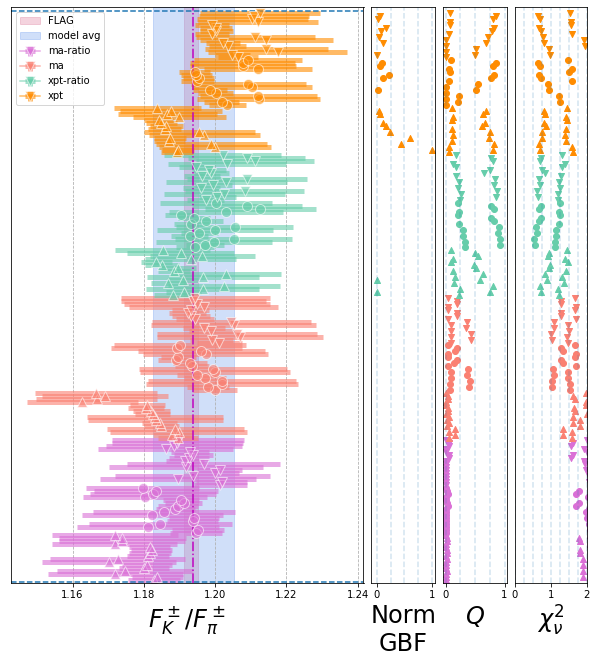

In [6]:
model_average.plot_comparison(other_results=other_results, param='FK/Fpi_pm', show_model_avg=True)''

In [ ]:
fk_fpi.partia

In [ ]:
gv.corr()

In [37]:
def error_budget(self):
    error = dict()
    
    #for base_model in np.unique([self._get_model_info_from_name(name)['base'] for name in self.fit_results]):
    for model in list(self.fit_results)[12:13]:
        print('\n', model)
        prior = self.fit_results[model]['prior']
        posterior = self.fit_results[model]['posterior']
        for lec in prior:
            fk_fpi = self.fit_results[model]['FK/Fpi']
            #print(gv.corr(fk_fpi, prior[lec]))
            print(fk_fpi)
            print(lec, fk_fpi.partialsdev(prior[lec]))
            print(lec, fk_fpi.partialsdev(posterior[lec]))
            
            phys_point_data = self._get_phys_point_data(model)
            eps2_pi = phys_point_data['mpi']**2 / phys_point_data['lam2_chi']
            print('eps2_pi', fk_fpi.partialsdev(eps2_pi))
        
    

error_budget(model_average)




 ma-ratio_FKFK_nnlo_logSq_sunset_alphaS_a4
-0.3448807729671478
1.1917(49)
A_a 0.004933798483224514
A_a 0.004933798483224514
eps2_pi -0.0
0.4002125335950465
1.1917(49)
A_aa 0.004933798483224514
A_aa 0.004933798483224514
eps2_pi -0.0
-0.3744168762403517
1.1917(49)
A_k 0.004933798483224514
A_k 0.004933798483224514
eps2_pi -0.0
0.020955100691821178
1.1917(49)
A_loga 0.004933798483224514
A_loga 0.004933798483224514
eps2_pi -0.0
0.31979027791883713
1.1917(49)
A_p 0.004933798483224514
A_p 0.004933798483224514
eps2_pi -0.0
-0.020483401723443522
1.1917(49)
L_4 0.004933798483224514
L_4 0.004933798483224514
eps2_pi -0.0
0.06063067618050976
1.1917(49)
L_5 0.004933798483224514
L_5 0.004933798483224514
eps2_pi -0.0


In [96]:
# Problematic fit:
#{'fit': 'nnlo', 'exclude': [], 'vol': 10, 'include_alpha_s': False, 'include_latt_n3lo': True, 'include_log': True, 'include_log2': True, 'include_sunset': True}


In [92]:
a = {}

In [93]:
a.setdefault('hi', 10)

10

In [24]:
m = gv.gvar(0.1, 0.01)
v = gv.gvar(50, 0.5)
E = 0.5 *m *v**2

print(E.sdev, E.partialsdev([m, v]))

12.747548783981962 12.747548783981962


In [ ]:
    tmp = fit_e.report_phys_point(phys_point)['phys']
    Lchi_phys = phys_point['Lchi_'+FPK]
    p_phys = dict()
    p_phys[('phys','p2')] = phys_point['mpi']**2 / Lchi_phys**2
    p_phys[('phys','k2')] = phys_point['mk']**2 / Lchi_phys**2
    p_phys[('phys','e2')] = 4./3*p_phys[('phys','k2')] - 1./3 * p_phys[('phys','p2')]
    print('stat',tmp.partialsdev(fit_e.fit.y))
    for i in range(1,9):
        print('L'+str(i), fit_e.fit.p['L'+str(i)], tmp.partialsdev(fit_e.fit.prior['L'+str(i)]))
    for lec in ['p_4','k_4','s_4','saS_4','s_6']:
        if lec in fit_e.fit.prior:
            print(lec, fit_e.fit.p[lec], tmp.partialsdev(fit_e.fit.prior[lec]))
    print('phys point','e_piSq = %s, e_KSq = %s'
        %(str(p_phys[('phys','p2')]),str(p_phys[('phys','k2')])), \
            tmp.partialsdev(p_phys[('phys','p2')],p_phys[('phys','k2')]))

In [ ]:
def error_budget(s,result_list):
    err = dict()
    for ansatz_truncate in s['ansatz']['type']:
        result = result_list[ansatz_truncate]
        fit = result['fit']
        prior = fit.prior
        priorc = result['phys']['priorc']
        phys = result['phys']['result']
        statistical = phys.partialsdev(fit.y,priorc['epi'],priorc['ed'])
        # compile chiral and discretization and finite volume lists then splat as function input
        X_list = []
        d_list = []
        k_list = []
        v_list = []
        at = ansatz_truncate.split('_')
        ansatz = at[0]
        n = int(at[1])
        for key in prior.keys():
            ks = key.split('_')
            k = ks[-1]
            if k[0] in ['c','g'] and ansatz_truncate in key:
                X_list.append(prior[key])
                k_list.append(key)
            if k[0] in ['a','s','b'] and ansatz_truncate in key:
                d_list.append(prior[key])
                k_list.append(key)
            if s['ansatz']['FVn'] is 3 and k[0] in ['f'] and ansatz_truncate in key:
                v_list.append(prior[key])
                k_list.append(key)
        chiral      = phys.partialsdev(*X_list)
        disc        = phys.partialsdev(*d_list)
        if s['ansatz']['FVn'] is 3:
            fv = phys.partialsdev(*v_list)
        else:
            fv = 0
        pct = {'stat':[statistical/phys.mean*100],'chiral':[chiral/phys.mean*100],'disc':[disc/phys.mean*100],'fv':[fv/phys.mean*100],'total':[phys.sdev/phys.mean*100]}
        std = {'stat':statistical,'chiral':chiral,'disc':disc,'fv':fv,'total':phys.sdev}
        err[ansatz_truncate] = {'pct':pct,'std':std,'mean':phys.mean}
    return err